In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import accuracy_score , recall_score , f1_score,precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import pickle
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
parkinsons_data = pd.read_csv('/content/drive/MyDrive/ML_projects_data/Parkinsson disease.csv')

In [ ]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinsons_data['status'].value_counts()
# 1-> infected
# 0-> healthy


status
1    147
0     48
Name: count, dtype: int64

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

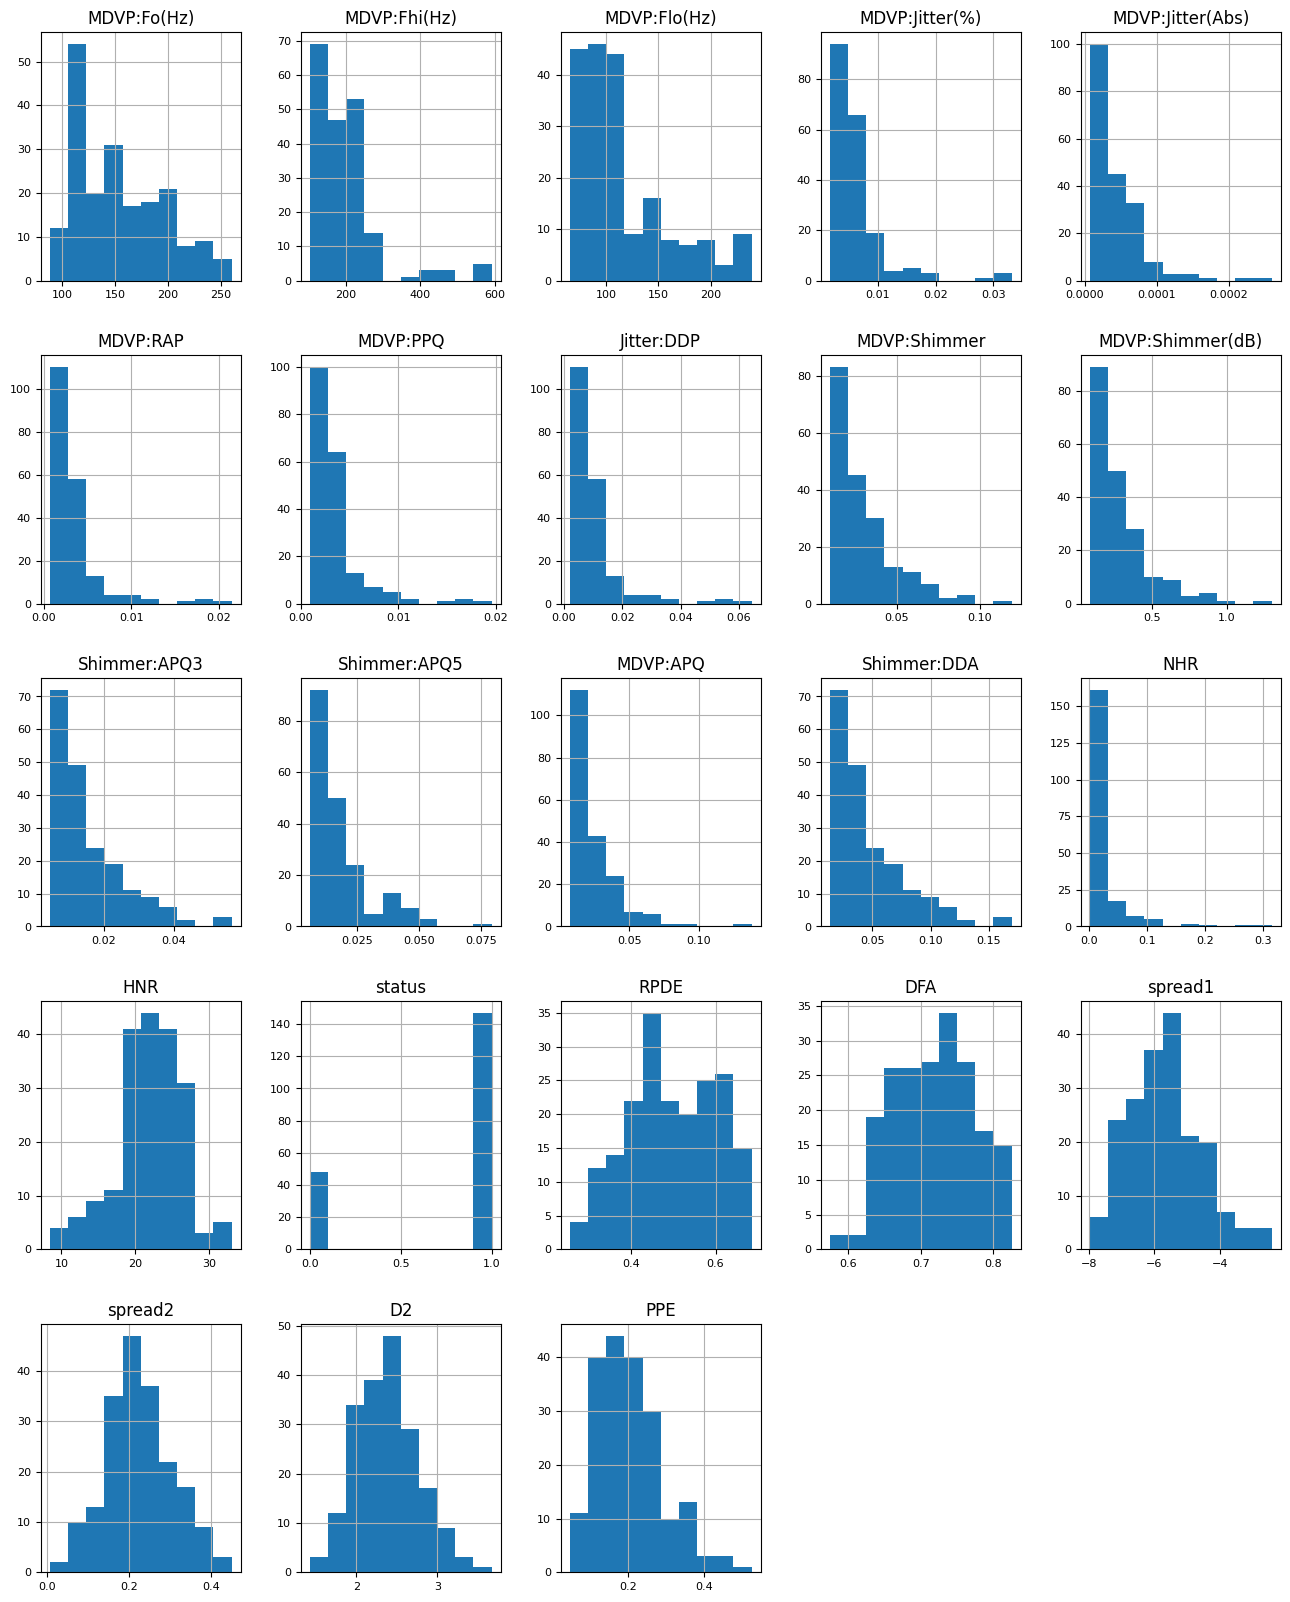

In [ ]:

parkinsons_data.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier(n_estimators=1000)
model5= xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [ ]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier', 'XGBoost']
result1 = []
result2 = []
result3 = []
result4 = []
result5 = []

In [ ]:
def cal(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    accuracy = accuracy_score(pre,y_test)
    precision = precision_score(y_test, pre)
    recall = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    auc = roc_auc_score(y_test, pre)


    result1.append(accuracy)
    result2.append(precision)
    result3.append(recall)
    result4.append(f1)
    result5.append(auc)
    print(model)

    print("accuracy is : ",accuracy , ", recall is : ",recall , ", f1 is : ",f1, ", precision is :", precision,", AUC is : ",auc)


In [ ]:
cal(model1)

LogisticRegression()
accuracy is :  0.8205128205128205 , recall is :  0.9 , f1 is :  0.8852459016393444 , precision is : 0.9 , AUC is :  0.747983870967742


In [ ]:
cal(model2)

SVC()
accuracy is :  0.8974358974358975 , recall is :  0.8857142857142857 , f1 is :  0.9393939393939393 , precision is : 0.8857142857142857 , AUC is :  0.75


In [ ]:
cal(model3)

RandomForestClassifier()
accuracy is :  0.8461538461538461 , recall is :  0.9032258064516129 , f1 is :  0.9032258064516129 , precision is : 0.9032258064516129 , AUC is :  0.7641129032258064


In [ ]:
cal(model4)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.8461538461538461 , recall is :  0.9310344827586207 , f1 is :  0.9 , precision is : 0.9310344827586207 , AUC is :  0.810483870967742


In [ ]:
cal(model5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
accuracy is :  0.8717948717948718 , recall is :  0.9642857142857143 , f1 is :  0.9152542372881356 , precision is : 0.9642857142857143 , AUC is :  0.872983870967742


In [ ]:
results_df = pd.DataFrame({
    "Model":columns,
    "Accuracies":result1,
    "Precision": result2,
    "Recall":result3,
    "F1_Score":result4,
    "AUC":result5
})

In [ ]:
results_df

,Model,Accuracies,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.820513,0.900000,0.900000,0.885246,0.747984
1,SVC,0.897436,0.885714,0.885714,0.939394,0.750000
2,RandomForestClassifier,0.846154,0.903226,0.903226,0.903226,0.764113
3,GradientBoostingClassifier,0.846154,0.931034,0.931034,0.900000,0.810484
4,XGBoost,0.871795,0.964286,0.964286,0.915254,0.872984


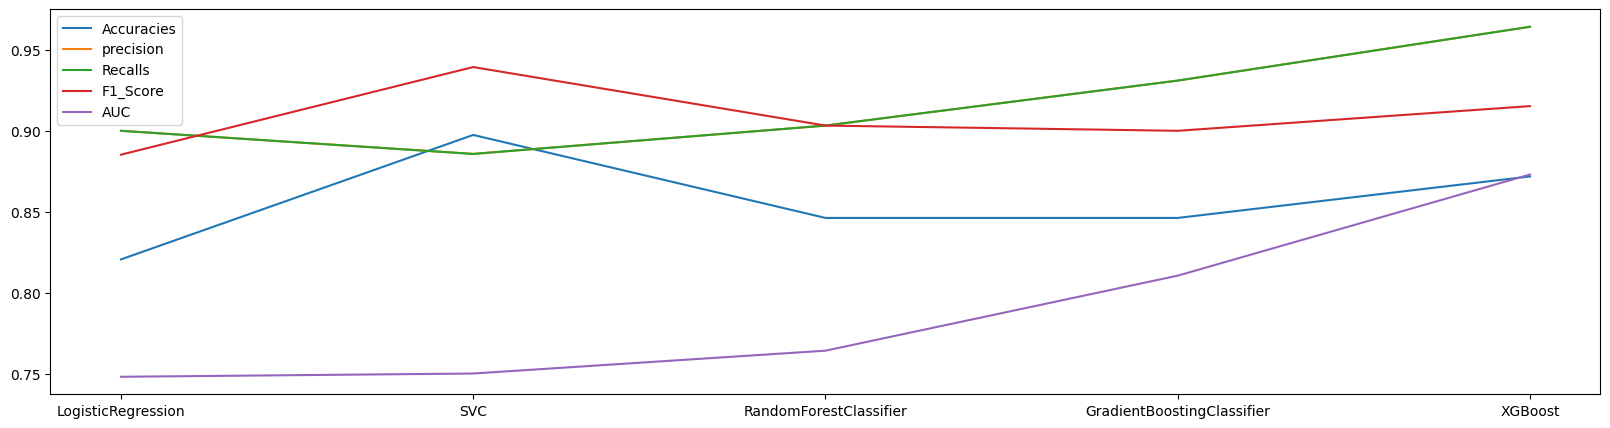

In [ ]:
fig,ax = plt.subplots(figsize=(20,5))

plt.plot(results_df.Model,results_df.Accuracies,label='Accuracies')
plt.plot(results_df.Model,results_df.Precision,label='precision')

plt.plot(results_df.Model,results_df.Recall,label='Recalls')
plt.plot(results_df.Model,results_df['F1_Score'],label='F1_Score')
plt.plot(results_df.Model,results_df.AUC,label='AUC')

plt.legend()
plt.show()

In [ ]:
svc_model=SVC().fit(X_train,y_train)

In [ ]:
filename = 'svc_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(svc_model, file)

# Code to download the file in Colab
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
importances = model3.feature_importances_
feat_imp = pd.Series(importances, index = X.columns).sort_values()


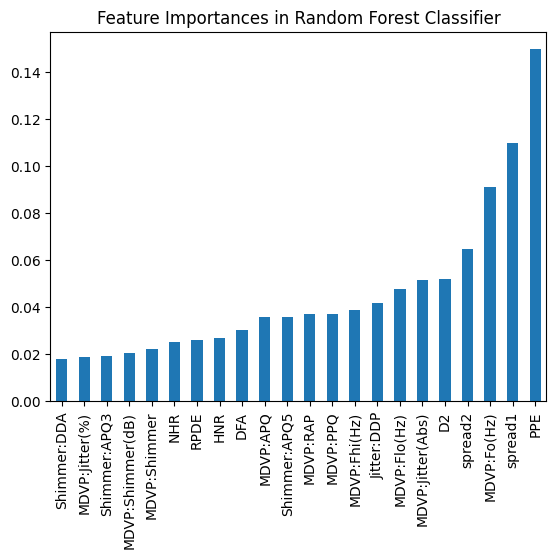

In [ ]:
feat_imp.plot(kind = 'bar', title = 'Feature Importances in Random Forest Classifier');
